In [1]:
# This script is used to run the detection script in the BounceInsight module.
import sys
import os
current_dir = os.path.dirname(os.path.abspath('__file__'))
print(f'Current Directory: {current_dir}')
root_dir = os.path.abspath(os.path.join(current_dir, '..'))

if os.path.exists(root_dir):
    print(f'Root Directory exists: {root_dir}')
else:
    print(f'Root Directory does NOT exist: {root_dir}')
    

if root_dir not in sys.path:
    sys.path.append(root_dir)
    
try:
    from BounceInsight import BounceInsight
    print("Successfully imported BounceInsight")
except ModuleNotFoundError as e:
    print(f"BounceInsight module not found. Please check the module path. {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    
try:
    %reload_ext autoreload
except:
    %load_ext autoreload

%autoreload 2
    
csv_path = os.path.abspath(os.path.join(current_dir, 'files/loader'))
insight = BounceInsight(csv_path, "bounce")

Current Directory: /Users/timomauricespengler/Desktop/BounceInsight
Root Directory exists: /Users/timomauricespengler/Desktop
Successfully imported BounceInsight


Dip detected: True


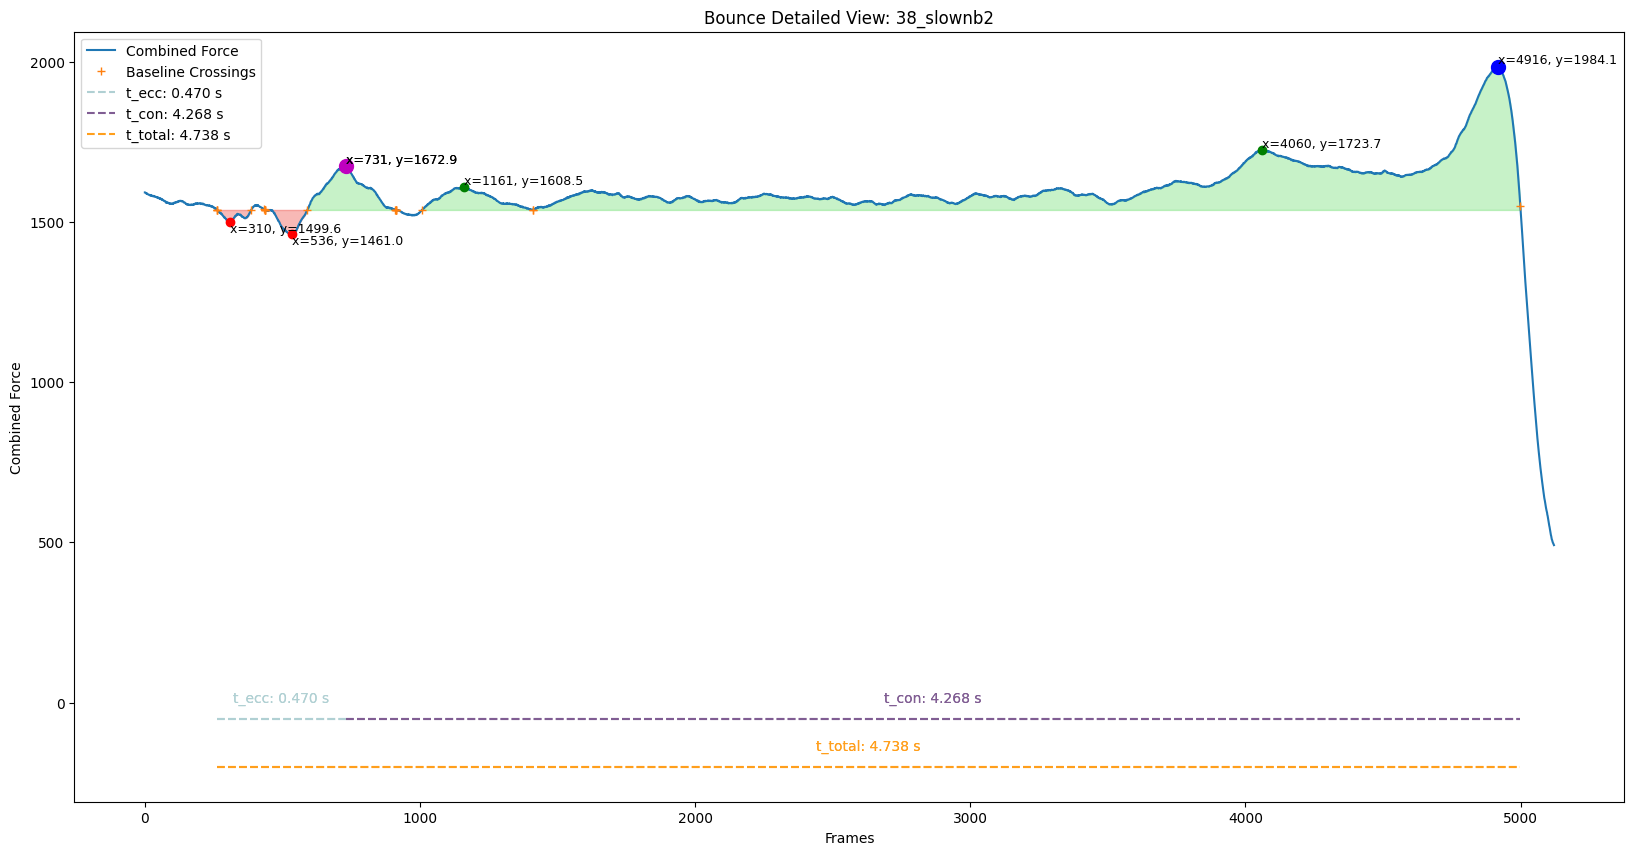

{'fps': 1000, 'source': 'fp', 'device': 'fp3d', 'gender': 'f', 'load': 85.0, 'bodyweight': 71.7}


In [12]:
insight.plot_data(file_name='38_slownb2')

In [10]:
insight.analyse_bounce(id=38, plot=False)

Finished 38_bounce70b2.csv: 100%|██████████| 23/23 [00:02<00:00, 10.89it/s]   

Number of bounce files in bounce_dict_70: 3
Number of bounce files in no_bounce_dict_70: 3
Number of bounce files in bounce_dict_80: 3
Number of bounce files in no_bounce_dict_80: 3
Number of bounce files in bounce_dict_slow: 3
Number of bounce files in no_bounce_dict_slow: 3
Number of bounce files in bounce_dict_fast: 3
Number of bounce files in no_bounce_dict_fast: 2


Results saved to validation/validation_results.csv
Visualized validation results saved to validation/validation_results.xlsx
Validation complete
Total points: 776
Points within limits: 751 (96.78%)
Points outside limits: 25 (3.22%)
The data is good (more than 95% points within limits of agreement).
Mean 0.11219329896907218, STD 0.22898530375668105
Lower limit: -0.3366178963940226, Upper limit: 0.561004494332167, Span: 0.8976223907261897


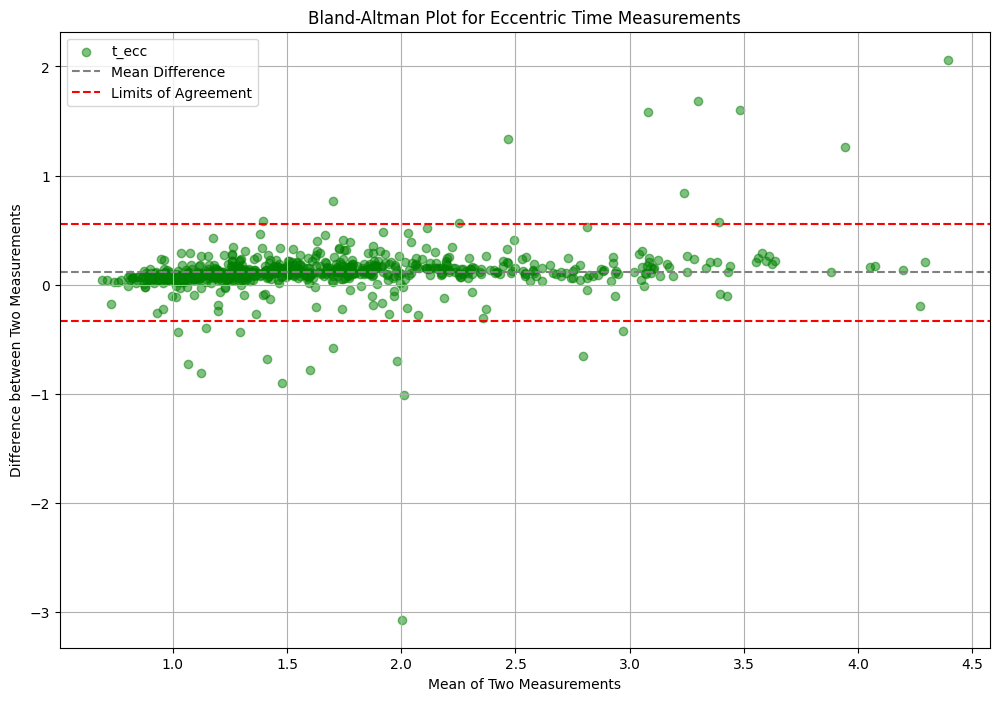

Total points: 776
Points within limits: 762 (98.20%)
Points outside limits: 14 (1.80%)
The data is good (more than 95% points within limits of agreement).
Mean -0.14036984536082472, STD 0.15246433947762086
Lower limit: -0.4391999507369616, Upper limit: 0.1584602600153122, Span: 0.5976602107522738


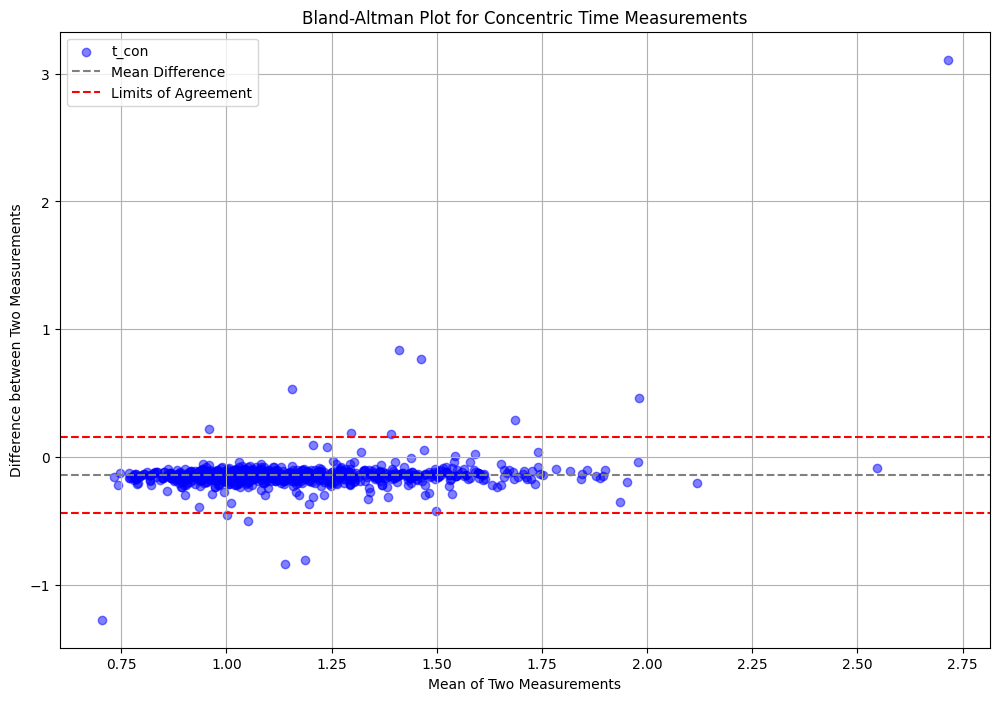

Total points: 776
Points within limits: 744 (95.88%)
Points outside limits: 32 (4.12%)
The data is good (more than 95% points within limits of agreement).
Mean -0.07124355670103091, STD 0.18569179294948168
Lower limit: -0.43519947088201505, Upper limit: 0.29271235747995317, Span: 0.7279118283619682


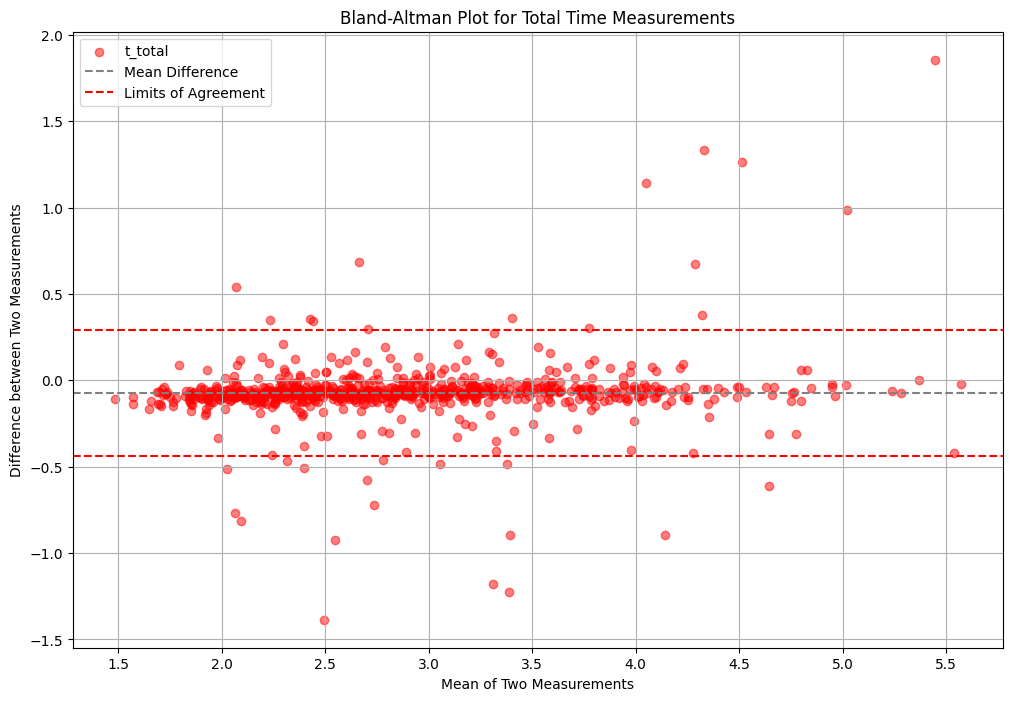

Total points: 776
Points within limits: 743 (95.75%)
Points outside limits: 33 (4.25%)
The data is good (more than 95% points within limits of agreement).
Mean 54.3349108987325, STD 145.1436076754661
Lower limit: -230.146560145181, Upper limit: 338.81638194264605, Span: 568.9629420878271


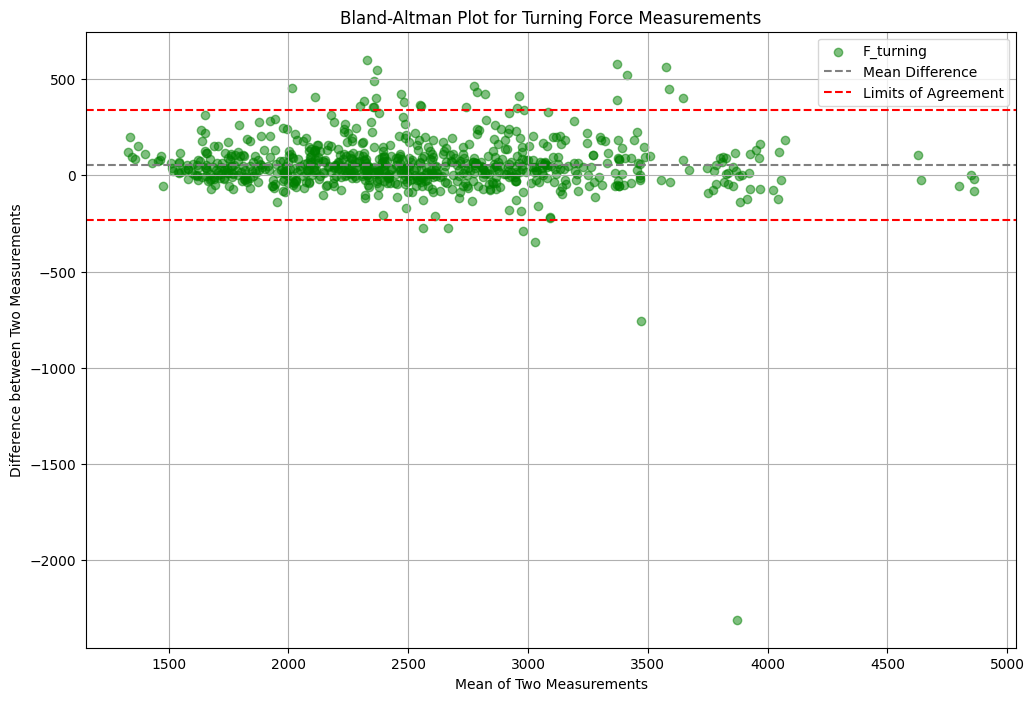

Total points: 776
Points within limits: 736 (94.85%)
Points outside limits: 40 (5.15%)
The data is not good (less than 95% points within limits of agreement).
Mean -283.4587813933208, STD 327.68566739931504
Lower limit: -925.7226894959782, Upper limit: 358.8051267093366, Span: 1284.5278162053148


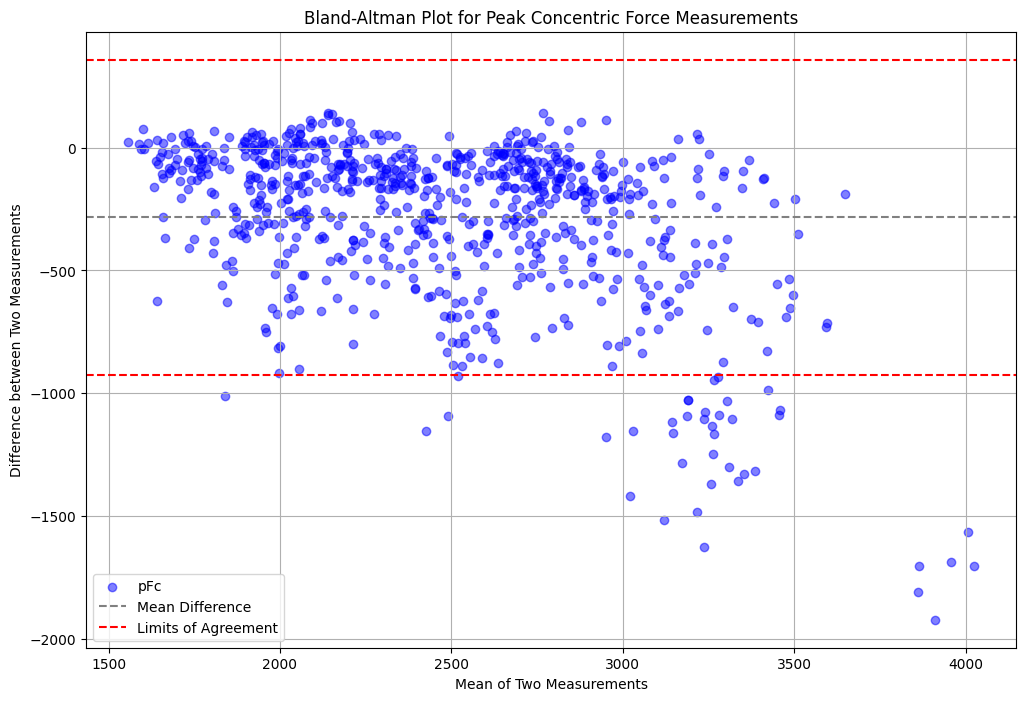

Total points: 776
Points within limits: 734 (94.59%)
Points outside limits: 42 (5.41%)
The data is not good (less than 95% points within limits of agreement).
Mean 212.49355064702195, STD 63.998791646633315
Lower limit: 87.05591901962066, Upper limit: 337.93118227442324, Span: 250.87526325480258


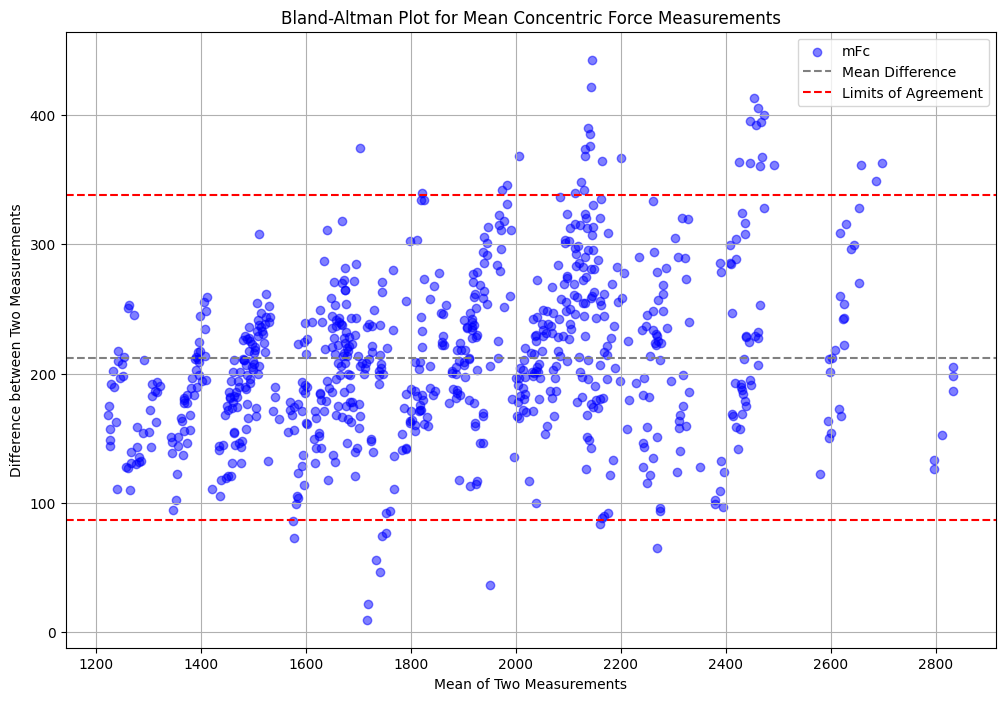

Correlation for t_ecc: 0.95, p-value < 0.001
Correlation for t_con: 0.84, p-value < 0.001
Correlation for t_total: 0.97, p-value < 0.001
Correlation for F_turning: 0.97, p-value < 0.001
Correlation for pFc: 0.83, p-value < 0.001
Correlation for mFc: 0.99, p-value < 0.001


In [2]:
insight.validate(tolerance=0.05)

Dip detected: True


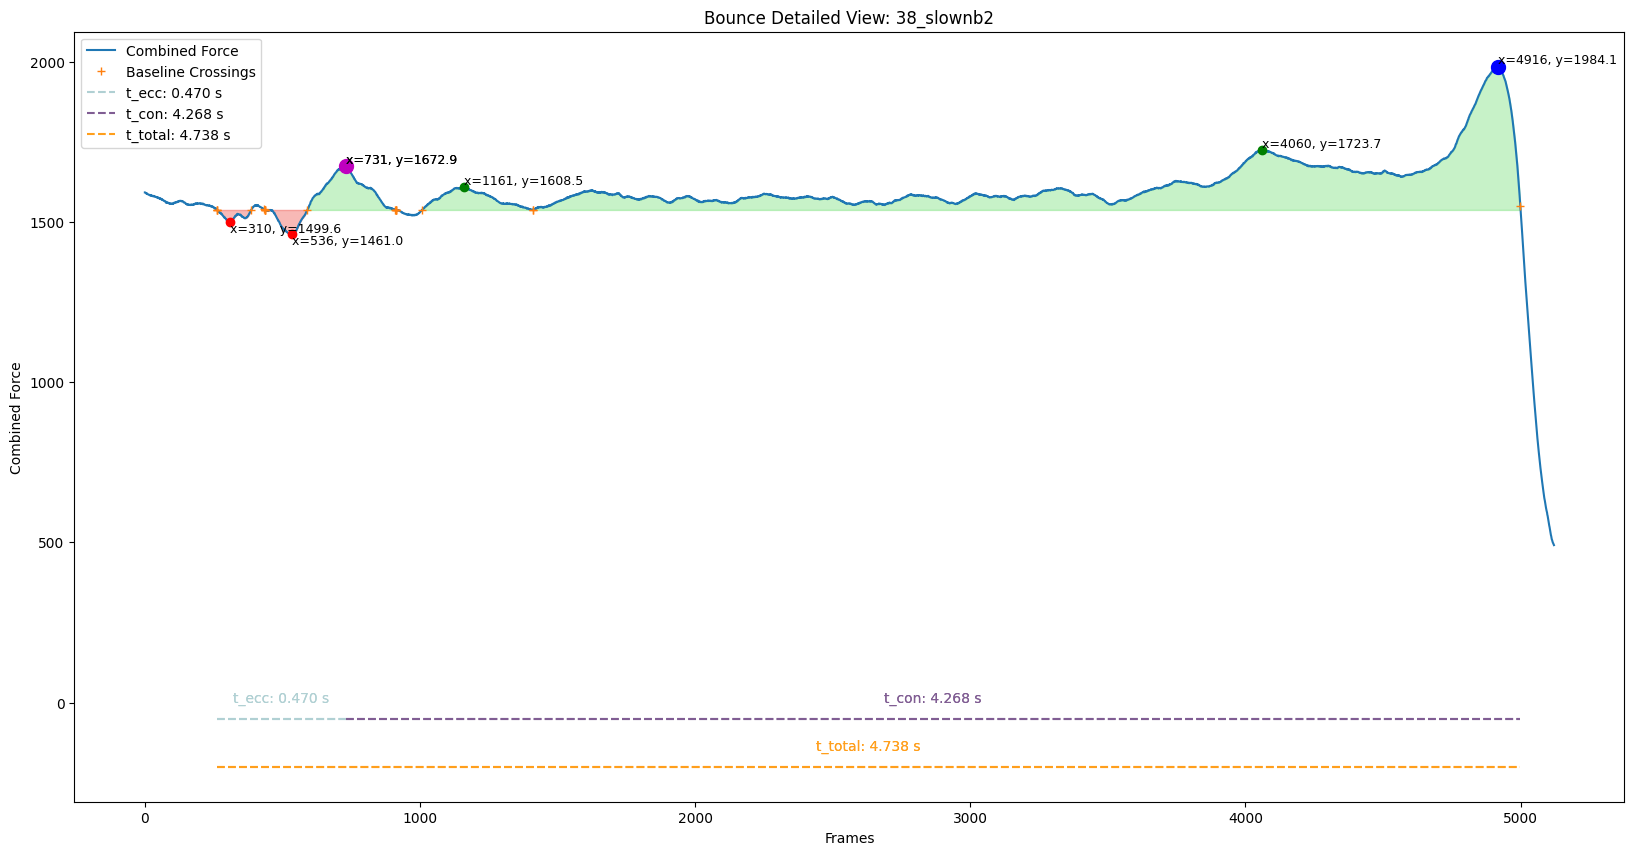

{'fps': 1000, 'source': 'fp', 'device': 'fp3d', 'gender': 'f', 'load': np.float64(85.0), 'bodyweight': np.float64(71.7)}


In [4]:
insight.plot_data(file_name='38_slownb2')